- # 요약
    1. classification with localization
    2. Landmark detection
    3. Sliding windows detection
        - FC 레이어 변환
        - CNN sliding window 구현
    4. YOLO
    5. 객체 탐지 평가 방법 
        - Intersection over Union(IoU)
        - Non-max Suppression
        - Anchor box
    6. UNet
        - Traspose Convolution
        - UNet Architecture
    7. 얼굴 인식
        - Verification
        - Recognition
        - One-shot learning
            - Siamese Network
                - Triplet Loss function
                - Logistic Regression
    8. Neural style transfer
        - $J_{content}$
        - $J_{Style}$
            - 프로비니우스 노름
            - 정규화 상수
            - Gram matrix

- ## 객체 현지화
    - classification with localization
        - 객체를 탐지하고 바운딩 박스를 정의하는 과정을 말함
        - 클래스 레이블과 좌 상단을 (0,0) , 우 하단을 (1,1) 로 정의하고 사각형의 중간점과 폭, 높이를 정의해야함
            - $ b_x, b_y$
            - $b_w, b_h$
            - class label
                - 클래스는 원 핫 벡터 형태로 출력해야함
        
        - 손실함수
            - 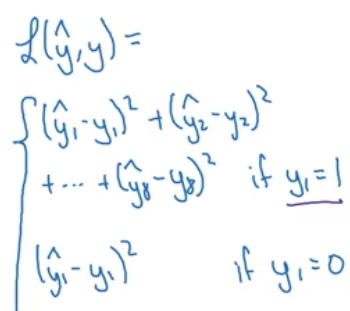
            - 개별적인 손실값의 합이라 생각하면됨
            - mse 기준
            

- ## Landmark detection
    - 랜드마크의 지점 $l_x, l_y$ 여러개를 구하는 문제임
    - cnn 거쳐서 출력으로 랜드마크 자체의 존재여부와 랜드마크의 x,y 좌표로 이루어져있음
    - 랜드마크의 레이블은 일관성이 있게 디자인할것
    

- ## Sliding window algorithm
    1. 고정된 크기의 바운딩 박스를 기준으로 삼는다.
    2. 입력 이미지에 대해 바운딩 박스 크기로 잘라서 잘린 이미지에 객체 탐지를 연산한다
    3. 자르는 위치를 천천히 이동시켜 이미지 전체를 체크할때까지 진행한다
    4. 다른 크기의 바운딩 박스에도 진행한다.
    - 이미지 단위의 커널 합성곱이라 생각하면 편함
    - 연산비용이 매우 높음
        - 최적화를 위해 스트라이드를 키우면 성능에 큰 영향을 줌
    


    
- ## CNN Sliding windows 구현
    - ### FC 레이어를 Conv 레이어로 변환하기
        1. 입력과 동일한 크기의 커널을 fc레이어 뉴런 수와 동일한 갯수만큼 합성곱한다
        2. 이는 수학적으로 fc 레이어와 같은 레이어임
        - 예시
        - 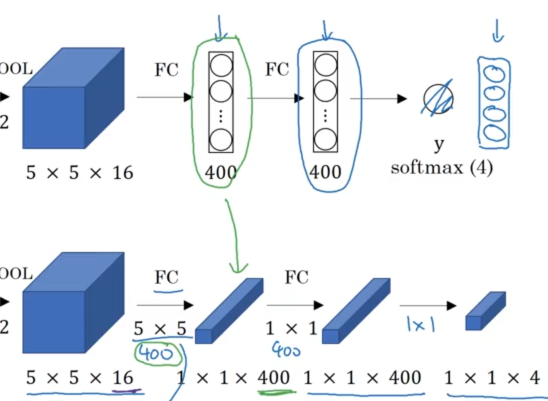

    - 슬라이딩 윈도우에는 중복된 연산이 매우많음
        - 최적화 필요함
    - 구현 과정
        1. 기존 CNN의 fc 레이어를 conv레이어로 변환한다
        2. 이미지를 바운딩박스와 동일한 크기로 잘라서 넣지 않고, 전체 이미지를 입력으로 넣고 동일한 연산을 진행한다.
        3. 최종값으로 행렬의 형태로 슬라이딩 윈도우 연산을 한 결과값이 나온다
        - 즉 바운딩 박스 크기 단위로 크기 $1*1$ 행렬로 출력하는 신경망을 만들고, 전체 이미지를 이 신경망의 입력으로 넣는다
        - 이때 스트라이드는 풀링 레이어의 스트라이드와 동일하다
        - 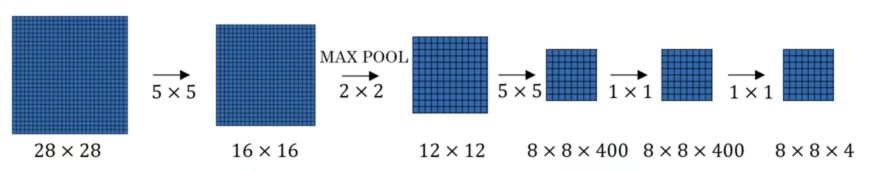

- ## 바운딩 박스 예측
    - YOLO
        - 과정
            1. 이미지를 $S*S$ 개의 그리드로 나눈다
            2. grid cell 별로 객체 중심점 유무를 탐지한다
            3. 나온 예측 결과를 $S*S*(객체 탐지 출력행렬)$ 의  크기의 행렬로 출력한다.
            - 그리드 셀의 좌상단을 (0,0), 우하단을 (1,1)로 정의하고 해당값을 기준으로 바운딩 박스 수치를 지정한다

        
        - 객체가 여러 그리드 셀에 겹쳐있어도 중심점 기준으로 탐지돼기 때문에 문제없음
        - 실행속도가 매우 빠름


- ## 객체 탐지 평가 방법
    - Intersection over Union (IoU)
        - #### $\frac{예측 박스 안의 실제 물체 박스의 크기}{예측 박스의 크기}$
        - Correct if ioU>=0.5

- ## Non-max suppression
    - Yolo 에서 그리드 셀 별로 객체감지 시 같은 객체를 여러번 감지될 수 있음
        - 그리드 안에 포함되는 중심점은 하나지만 다른 그리드에서도 중심점이라고 착각할 수 잇음
    - 과정
        - 우선적으로 임계확률 이하의 박스 제거함
        1. 확률 분포가 높은 순서대로 박스를 정렬
        2. 가장 높은 확률 분포를 가진 박스를 선택
        3. 이 선택된 박스를 기준으로 다른 박스들과 Iou 계산함
        4. 이 IoU 가 임계점이 넘는 박스를 제거함


- ## Anchor box
    - Yolo 알고리즘은 그리드별로 하나의 객체밖에 탐지 못함
    - 앵커 박스를 사용해 어느정도 해결가능함
    - 과정
        1. 고정된 크기의 앵커 박스 생성함
        2. 그리드 셀 별로 객체 탐지함
        3. 객체가 탐지되면 객체 바운딩 박스와 각 앵커박스의 iou 계산
        4. 가장 iou 높은 앵커 박스 할당
        5. 이 앵커 박스를 기준으로 박스 좌표 보정함
        - 이때 출력 행렬은 (grid cell, anchor boxes) 형태가 된다
    - 앵커 박스 갯수를 초과하는 경우는 잘 처리못함
    - 미리 정의된 앵커 박스 모양을 초과하는 갯수의 객체는 잘 처리못함
    
    - 알고리즘을 몇몇 특이한 형태의 객체에 전문화시키는 데에는 좋음
    

- ### YOLO 예시
    - 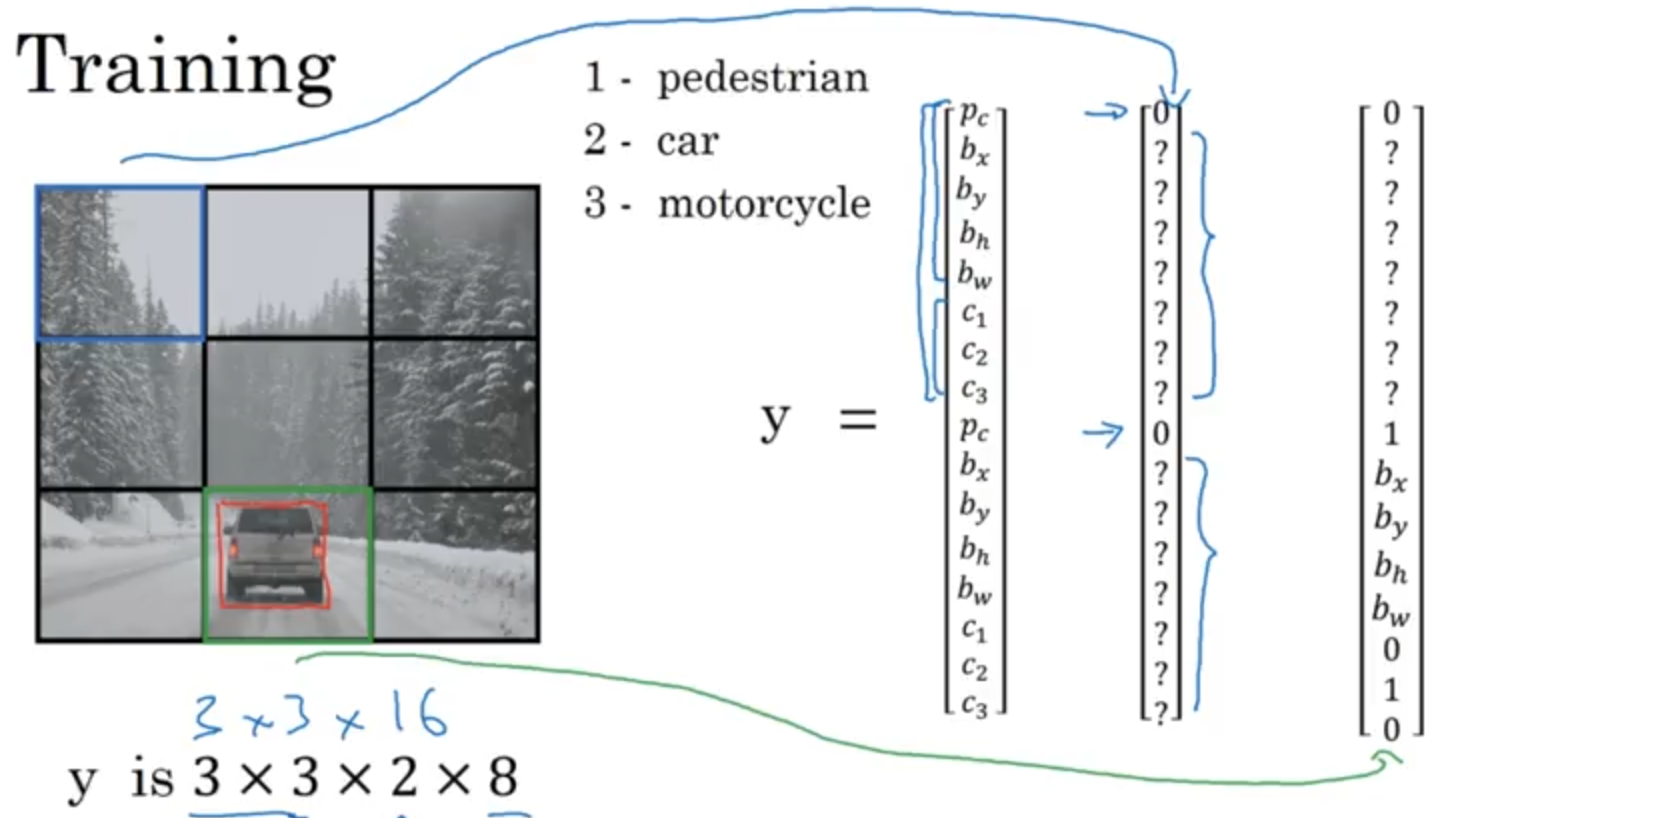
    

- Region proposal
    - 객체가 있을만한 부분을 클러스터링 한 후 해당 지역에만 객체탐지를 시행하는 방법임
    - segmentational algorithm 으로 요소를 분리함
    

- ## UNet
    - Sementic Segmentation
        - 객체를 탐지한 후 픽셀 단위로 정교하게 분리해내는 과정임
        - 예시
        - 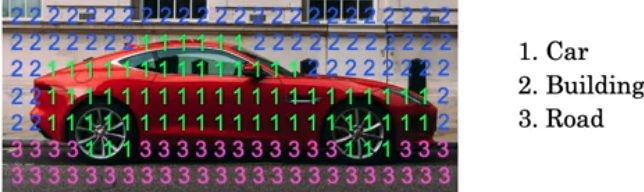
    
    - CNN 등 객체탐지를 수행하며 줄어든 출력행렬의 크기, 차원을 다시 원본 크기로 복구해야함
    - 작은 크기의 행렬을 다시 확장하는 Transpose Convolution 필요함
    - #### Transpose Convolution 
        - 과정
            1. 입력 행렬의 한 값과 필터를 곱한다.
            2. 나온 값을 좌상단의 값 기준으로 출력 행렬 $(n*f) \times (n*f)$ 에 배치한다.
            3. 스트라이드만큼 이동하여 입력행렬의 다음 값에 연산한다
            4. 겹치는 값은 합한다
            5. 연산이 끝나면 패딩만큼 행렬의 가장자리를 잘라낸다

        
    - 과정
        1. 일반적인 CNN 레이어인 Conv,ReLu, Max Pool 연산을 단계적으로 한다
        2. 이전 단계 Conv 연산과 동일한 크기의 행렬을 출력하는 Transpose Convolution 연산을 똑같이 단계적으로 한다.
        3. 동일한 단계의 Conv 연산과 Transpose Convolution 연산 사이에 Skip Connection 을 생성한다
        4. 입력 이미지와 동일한 크기의 행렬까지 연산되면 그 행렬이 1*1 Conv 연산을 한다
        5. 마지막으로 argmax 연산으로 픽셀을 분류한다

        - 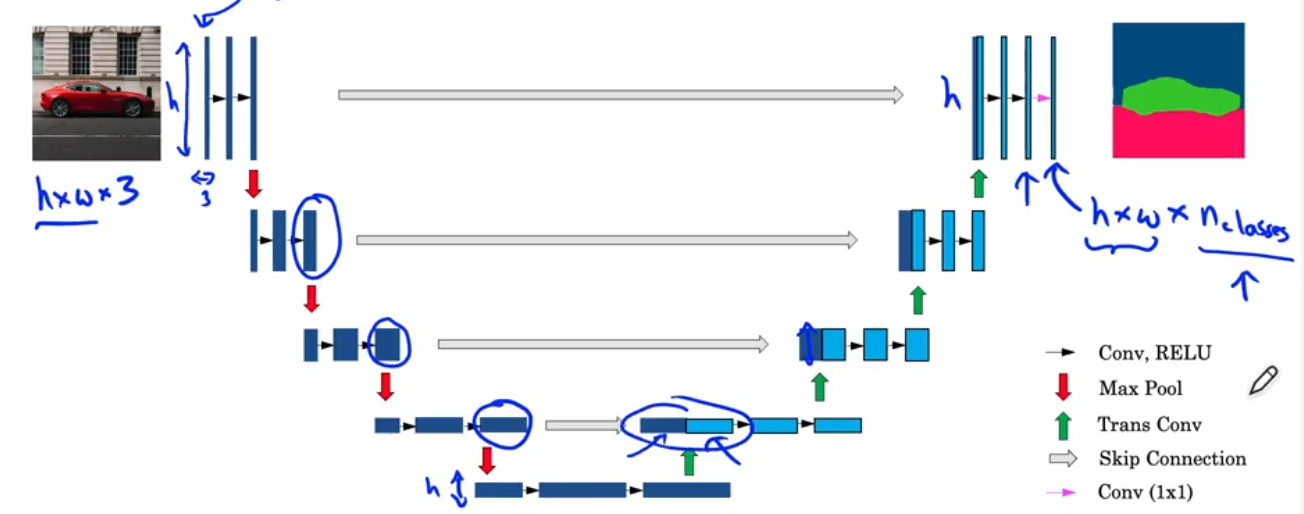


- ## Neural style transfer
    - 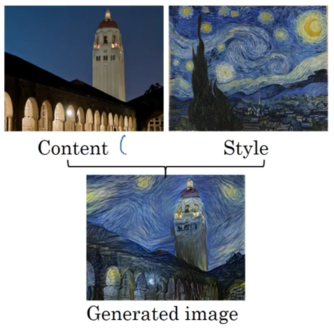
    - 컨텐트 이미지 $C$, 스타일 이미지 $S$를 입력으로 넣어 스타일 모양과 유사한 형태의 생성 이미지 $G$ 출력
    - 과정
        1. 히든 유닛의 레이어 1에서 활성화 함수를 최대화하는 9개의 이미지 패치를 가져온다.
        2. 다른 히든 유닛에서도 진행한다
        3. 상위레이어에서도 같은 같은 과정을 반복한다
            - 상위 레이어로 갈수록, 더 복잡하고 큰 패턴을 인식하게 된다
        4. $ J(G) = \alpha J_{\text{content}}(C, G) + \beta J_{\text{style}}(S, G) $
            - 컨텐트 비용함수와 스타일 비용함수를 더해 비용함수를 측정한다
            - 하이퍼파라미터 $\alpha, \beta$ 를 통해 어느 쪽에 더 비중을 둘지 정한다
            - $ J_{\text{content}}(C, G) = \frac{1}{2} \| a^{[l]}(C) - a^{[l]}(G) \|_2^2 $
              - 컨텐트 함수의 비용함수는 L2 노름의 제곱으로 정의함
            - 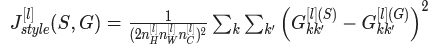
                - $S$ 와 $G$ 의 gram matrix의 프로베니우스 노름에 정규화 상수를 곱한 식이다
                
        5. 출력이미지 G 를 랜덤한 값으로 초기화한다
            - 노이즈 같은 이미지 생성
        6. 경사하강법을 사용해 $J(G)$ 를 최소화한다

    - 스타일 비용함수의 정의
        - Style matrix
            - 스타일 행렬의 원소는 $a_{i,j,k}^{[l]} = \text{activation at} (i,j,k)$ 으로 정의한다
                - $i,j,k$ 를 각각 이미지의 $H,W,C$ 에 대응된다
            - $ G^{[l]} \text{ is } n_c^{[l]} \times n_c^{[l]} $
            - $ G_{kk'}^{[l]} = \sum_i \sum_j a_{ijk}^{[l]} a_{ijk'}^{[l]} $
                - 스타일 비용함수 정의에 사용되는 gram matrix 정의임
                - 각 좌표의 채널의 활성화함수끼리 곱한다음 더함
                - 상관관계가 있을 시에 gram matrix 값 또한 높아짐
                - 스타일 이미지와 생성 이미지도 gram matrix 를 구한다.
            - $ J_{\text{style}}^{[l]}(S, G) = \| G^{[l]}(S) - G^{[l]}(G) \|_F^2 $
                - 비용함수는 프로베니우스 노름으로 측정한다
                    - 행렬의 모든 원소 제곱의 합의 제곱근임
                    - 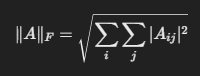
                - 여기에 정규화 상수를 곱한다



- ## 얼굴 인식
    - Verification
        - 입력 이미지와 이름, id 가 주어질 시 요청한 사람의 것이 맞는지 확인하는 문제
    - Recognition
        - K명의 사람 데이터가 있는 데이타베이스에서 입력 이미지가 주어질 시 db 내에 사랑이 있는지 확인하는 무넺
        - 더 어려운 문제임
        
    - One-shot learning
        - 얼굴인식은 하나의 입력이 주어져도 같은 사람 여부를 알아야함
        - 한가지 예를 통해서 인식해야함
        - 소프트맥스 회귀로는 적은 훈련 데이터만으로 충분한 성능의 신경망을 얻기 어려움
        - simularity function
            - 두 사진이 다름의 정도를 측정하는 함수
            - 이미지의 다른 정도에 따라 다른 값이 측정된다
            - $d(img1, img2)$ 
                - 하이퍼파라미터 $\tau $ 에 대해 simularity fuction $d(x^{(1)}, x^{(2)})$ 는
                - $ d(x^{(1)}, x^{(2)}) = \| f(x^{(1)}) - f(x^{(2)}) \|_2^2 $ 로 정의한다
                    - $x^{(1)}, x^{(2)} $ 를 신경망에서 처리한 값 $f(x^{(1)}) , f(x^{(2)})$ 의 L2 노름의 제곱임
                    - 이미지가 다르면 L2 노름을 크게, 작으면 다르게 하는 파라미터를 학습시킴
    
        - ### Siamese Network
            - 하나의 신경망으로 두 개의 입력 데이터에 대해 동일한 연산을 수행한 후
            - 각 입력의 추출된 특징 벡터로 거리 기반 비교 수행함
            - #### Triplet Loss
                - Anchor image $A$ , Positive image $P$ , Negative image $N$ 세 샘플을 활용하여 차이를 학습함
                - Anchor image 를 기준으로 Positvie Image 와의 simularity fuction 의 값을 작게 만듬
                - Anchor image 를 기준으로 Negative Image 와의 simularity fuction 의 값을 크게 만듬
                - $ \| f(A) - f(P) \|_2^2 \leq \| f(A) - f(N) \|_2^2 $
                    - 다만 이 식을 그대로 사용할 경우, 신경망이 모든 가중치를 9이 되도록 학습시키기 떄문에
                    - 하이퍼파라미터 마진 $\alpha$ 를 사용해 다음의 식을 사용한다
                    - $ \| f(A) - f(P) \|_2^2 - \| f(A) - f(N) \|_2^2 + \alpha \leq 0 $
                - $ \mathcal{L}(A, P, N) = \max \left( \| f(A) - f(P) \|_2^2 - \| f(A) - f(N) \|_2^2 + \alpha , 0 \right) $
                    - 0보다 작으면 0으로 만들도록 max 씌움
                - $ J = \sum\limits_{i=1}^{M} \mathcal{L}(A^{(i)}, P^{(i)}, N^{(i)}) $
                    - 손실함수에 따라 비용함수 정의

                - A,P,N 을 무작위 샘플을 사용할 경우 해당 식을 충족시키기 매우 쉬움
                    - 때문에 학습하기 어려운(차이가 작은) $A,P,N$ 을 선택해 훈련시켜야함
                    - $ \mathcal{L}(A, P) \approx \mathcal{L}(A, N) $
                
            - #### Logistic Regression
                - siamese 네트워크 출력을 가져와서, 로지스틱 회귀를 통해 예측할 수도 있음
                    - 두 이미지의 출력을 입력으로 한 뒤, 같으면 1, 다르면 0 출력
                    - 예측 예시
                        - $ \hat{y} = \sigma \left( \sum\limits_{k=1}^{128} w_i \left| f(x^{(i)})_k - f(x^{(j)})_k \right| + b \right) $
            - 입력 이미지가 db에서 나온 이미지라면 미리 신경망에 연산해둬 필요할떄 로드해 사용할수 있음
            

- ## 1D, 3D 에서의 Conv 연산
    - 2d 이미지에 2d 필터를 사용하듯이
    - n차원 입력엔 n 차원 필터를 사용한다
    - 그 외는 동일한 형태로 진행하면 된다
    - 예시
        - $14 \times 14 \times 14 $ 크기의 3차원 3채널 데이터를 다룬다면
        - $5 \times 5 \times 5 \times n_c$ 필터 $n_{filter}$ 개를 사용해
        - $6 \times 6 \times 6 \times n_c \times n_{filter}$ 크기의 출력을 만든다